# i. Introduction

--------------------------------------------------------------------
**FINAL PROJECT**

**Nama Anggota**  :  
1. Achmad Raihan  
2. Handwitanto Abrahan
3. Serina Roihaanah Mulawati
4. Stanly Sukmajaya Kwok

**Batch : RMT-036**
**GROUP 2** 

Program ini dibuat untuk mengetahui bagaimana sentimen masyarakat terhadap produk _Handphone_ yang sudah ada dan akan segera rilis.

--------------------------------------------------------------------


# ii. Problem Background

### ii. a. Prologue

Program ini dibuat untuk membantu masyarakat dalam memilih handphone dengan memanfaatkan analisis sentimen netizen di platform YouTube. Aplikasi ini dirancang untuk menganalisis sentimen komentar menggunakan teknik NLP (Natural Language Processing) berbasis Machine Learning atau Deep Learning.

Proses dimulai dengan pengumpulan data melalui scraping komentar pada video YouTube yang relevan dengan produk handphone tertentu. Data tersebut akan dianalisis untuk mengidentifikasi sentimen positif, negatif, atau netral. Hasil analisis ini, beserta visualisasi berupa word cloud, akan memberikan informasi yang berguna bagi pengguna untuk memahami opini publik terhadap produk tersebut.

Aplikasi ini bertujuan untuk memberikan rekomendasi berbasis data yang membantu masyarakat dalam pengambilan keputusan pembelian handphone. Selain itu, aplikasi ini juga memberikan wawasan tambahan dari analisis eksploratif (EDA) yang dapat digunakan untuk memahami tren opini publik secara lebih luas. Dengan pendekatan ini, diharapkan pengguna dapat mengambil keputusan yang lebih informatif, efisien, dan tepat sasaran.

### ii. b. Business Understanding

Untuk mengidentifikasi kasus yang dimiliki, maka dirancang **SMART Framework** dengan rincian sebagai berikut:

- **SPECIFIC**:  
  Berfokus pada pembuatan aplikasi untuk memudahkan masyarakat dalam memilih handphone berdasarkan analisis sentimen netizen terhadap produk di platform YouTube.

- **MEASURABLE**:  
  Aplikasi harus mampu menganalisis sentimen dengan akurasi minimal 80% berdasarkan dataset pengujian.

- **ACHIEVABLE**:  
  Data akan diambil melalui scraping komentar pada video YouTube, kemudian diproses untuk menghasilkan analisis sentimen (positif, negatif, netral). Aplikasi juga akan menampilkan visualisasi berupa word cloud dari komentar yang dianalisis.  

- **RELEVANT**:  
  Dengan menyediakan informasi sentimen netizen, aplikasi ini akan membantu masyarakat dalam pengambilan keputusan yang lebih tepat saat membeli handphone. Hal ini dapat meningkatkan kepercayaan pengguna terhadap produk tertentu dan menghemat waktu mereka dalam menentukan keputusan untuk membeli handphone.  

- **TIME-BOUND**:  
  Proyek ini akan selesai dalam waktu satu minggu, termasuk pengumpulan data, pengolahan data, pengembangan model, pengujian, dan implementasi aplikasi.  

**PROBLEM STATEMENT**  
Target yang ingin dicapai adalah memberikan kemudahan bagi masyarakat dalam memilih handphone dengan memanfaatkan opini dan sentimen netizen di YouTube. Aplikasi ini akan mengidentifikasi sentimen positif, negatif, dan netral pada komentar terkait, sehingga pengguna dapat memperoleh gambaran umum tentang pendapat publik terhadap produk tertentu.

**Objective:**  
Proyek ini bertujuan untuk:  
1. Mengembangkan aplikasi yang dapat menganalisis sentimen komentar pada video YouTube menggunakan model Machine Learning/Deep Learning berbasis NLP.  
2. Mempermudah pengguna dalam memahami opini publik dengan menampilkan hasil analisis berupa sentimen utama dan word cloud.  
3. Memberikan rekomendasi yang informatif dan berbasis data untuk membantu pengambilan keputusan pembelian handphone.

### ii. c. Breaking Down the Problem

**Masalah utama:** `Menganalisis sentimen netizen untuk membantu masyarakat dalam memilih handphone berdasarkan opini publik di YouTube`  

Untuk memudahkan analisis dan menyelesaikan masalah, kita perlu memahami detail tentang masalah tersebut.  

- Apakah terdapat pola tertentu dalam sentimen netizen (positif, negatif, atau netral) yang dapat memberikan gambaran tentang keunggulan atau kekurangan handphone tertentu?  

- Fitur apa saja dalam teks komentar, seperti frekuensi kata, konteks kalimat, atau emosi tertentu, yang paling mempengaruhi analisis sentimen terhadap sebuah produk?  

- Apa rekomendasi yang dapat diberikan kepada masyarakat berdasarkan hasil analisis sentimen dan visualisasi (misalnya, word cloud) untuk membantu mereka membuat keputusan pembelian yang lebih baik?  

- Bagaimana hasil analisis sentimen ini dapat digunakan untuk mendukung strategi pemasaran merek handphone tertentu atau memberikan umpan balik kepada produsen untuk meningkatkan produk mereka?  

# iii. Import Libraries

Bagian ini berfungsi untuk menyimpan library yang akan digunakan dalam mengeksekusi sintaks.

In [232]:
import pandas as pd # For data manipulation using DataFrames.
import numpy as np  # For numerical operations and array handling.
import seaborn as sns
import matplotlib.pyplot as plt

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud
from textblob import TextBlob

import string

from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Serina
[nltk_data]     Roihaanah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Serina
[nltk_data]     Roihaanah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-------------------

# iv. Data Loading

Bagian ini berfungsi untuk melakukan loading data yang akan digunakan dalam analisa. 

In [233]:
#Load Dataset
df_ori = pd.read_csv('final_dataset.csv')

#duplicate
df = df_ori.copy()

Setelah data di load, berikut adalah tampilan data untuk 20 baris teratas.

In [234]:
df.head(20)

,author,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date
0,@rinzia2346,"""batre 5000 mah kerasa kurang awet ga sih di h...",Negative,2024-10-23T05:11:29Z,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan
1,@HABIIBURRAHMAAN,"Info ya kawan2,telefon ini tidak bagus untuk g...",Negative,2024-07-15T11:57:32Z,7,Tecno Spark 20C,Tecno,Entry-Level,24-Jan
2,@BangMamat-jm1cz,DEMI TUHAN AKU MENYESAL BELI TECNO SPARK 20.c....,Negative,2024-07-15T10:15:51Z,10,Tecno Spark 20C,Tecno,Entry-Level,24-Jan
3,@minpetir8799,yg saya rasain kok batre lumayan boros ya.ap c...,Negative,2024-06-16T01:23:44Z,1,Tecno Spark 20C,Tecno,Entry-Level,24-Jan
4,@AnugrahBintang-yb3bg,Punyaku kok gx ada tulisan NFC bagian depan bo...,Negative,2024-06-13T12:29:58Z,2,Tecno Spark 20C,Tecno,Entry-Level,24-Jan
5,@rosantieka5873,"Kak, nge-charge-nya emang lama atau punyaku aj...",Negative,2024-04-21T10:17:56Z,1,Tecno Spark 20C,Tecno,Entry-Level,24-Jan
6,@JackAmbatukam,HPnya ngeleg njir bagus infinix smart 8 niat b...,Negative,2024-02-22T12:25:43Z,8,Tecno Spark 20C,Tecno,Entry-Level,24-Jan
7,@LiriklaguKu-x8s,"Bang kok punya ku g ada fitur nfc nya, solusin...",Negative,2024-11-04T10:29:48Z,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan
8,@encischannel9849,Gue juga pake tekno spark 20c tp ko g ada nfc ya,Negative,2024-09-11T15:30:53Z,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan
9,@WelderIjo,hp dont play pubg nih,Negative,2024-05-03T12:14:37Z,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan


Berikut adalah 20 data terakhir dari dataset.

In [235]:
df.tail(20)

,author,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date
3302,@rhea11may22,Waduhhh baru sebulan m6pro.\r\nAda tmbhn 2'5jt...,Neutral,2024-10-14T17:29:07Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24
3303,@CSGAMING1997,Design Android sama semua model persegi panjan...,Neutral,2024-10-14T10:12:34Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24
3304,@jefrizubir2310,Warna apa tu mas..titan grey ya,Neutral,2024-10-14T09:19:59Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24
3305,@AryaJona,10:38 disini 14 t pro lebih tajam di warna kua...,Negative,2024-10-14T08:19:00Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24
3306,@Loremipsum0029,AMPAS ð,Negative,2024-10-14T07:45:41Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24
3307,@lutfi2072,Alhamdulillah semalem udah kebeli nih hp.. \r\...,Positive,2024-10-14T07:40:53Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24
3308,@realnazo617,Alhamdulillah akhirnya kebeli .,Positive,2024-10-14T06:48:46Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24
3309,@dwiangkling7351,"Kurang suka sama desainnya kameranya,udah terl...",Negative,2024-10-14T06:47:52Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24
3310,@FitrahG,"aneh banget desain hp xiaomi kali ini, terliha...",Negative,2024-10-14T06:30:42Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24
3311,@clopicloo8378,Xiaomi ketika ngurus hp:ðð\r\nXiaomi ket...,Positive,2024-10-14T06:23:42Z,0,Xiaomi 14T,Xiaomi,Flagship,Sep-24


# v. Exploratory Data Analysis

Dalam bagian ini akan mencakup dua hal, yaitu pemeriksaan karakteristik data dan deskripsi data secara statistik.

## v.a. Data Characteristic

Pada bagian ini akan dilakukan validasi data untuk memastikan bahwa data sesuai dengan aturan, format, atau standar tertentu dengan melakukan cek data duplikat, missing value, serta tipe data yang sesuai.

### v.a.1. Data Type Checking

Pada bagian ini akan dilakukan pemeriksaan terhadap tipe data setiap kolom.

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        3322 non-null   object
 1   comment       3322 non-null   object
 2   sentiment     3320 non-null   object
 3   timestamp     3322 non-null   object
 4   like_count    3322 non-null   object
 5   tipe_produk   3322 non-null   object
 6   brand         3322 non-null   object
 7   segment       3322 non-null   object
 8   release_date  3306 non-null   object
dtypes: object(9)
memory usage: 233.7+ KB


Dari informasi tersebut terlihat bahwa dalam dataset ini terdapat sebanyak 3322 data dan 9 kolom dengan keseluruhan kolom bertipe object atau string. Adapun terdapat missing value pada kolom `sentiment` dan `release_date` yang ditandai dengan adanya perbedaan jumlah baris non-null dengan entri data. 

Selanjutnya akan dilakukan penyesuaian terhadap tipe data yaitu pada kolom `like_count` akan diubah ke dalam tipe numerik dan untuk kolom `timestamp` akan diubah ke dalam tipe datetime.


In [237]:
#Ubah tipe data
df['like_count'] = pd.to_numeric(df['like_count'], errors='coerce')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   author        3322 non-null   object             
 1   comment       3322 non-null   object             
 2   sentiment     3320 non-null   object             
 3   timestamp     3322 non-null   datetime64[ns, UTC]
 4   like_count    3306 non-null   float64            
 5   tipe_produk   3322 non-null   object             
 6   brand         3322 non-null   object             
 7   segment       3322 non-null   object             
 8   release_date  3306 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(7)
memory usage: 233.7+ KB


Setelah dilakukan penyesuaian, kolom `timestamp` dan `like_count` telah sesuai dengan tipe yang seharusnya.

### v.a.2. Duplicate Checking

Pada bagian ini akan dilakukan pemeriksaan apakah dataset memiliki data duplikat atau tidak

In [238]:
df.duplicated().sum()

0

Diketahui bahwa dalam dataset ini tidak terdapat data duplikat.

### v.a.3. Missing Value Checking

Pada bagian ini akan dilakukan pemeriksaan apakah dalam dataset terdapat missing value atau tidak.

In [239]:
df.isnull().sum()

author           0
comment          0
sentiment        2
timestamp        0
like_count      16
tipe_produk      0
brand            0
segment          0
release_date    16
dtype: int64

Dari informasi yang tertampil, pada dataset ini terdapat 3 kolom yang memiliki missing value di dalamnya, diantaranya adalah kolom `sentiment` dengan 2 nilai missing, kolom `like_count` dengan 16 missing value, dan kolom `release_date` dengan 16 missing value. Pada data-data missing ini akan dilakukan penanganan saat melakukan Feature Engineering dengan metode yang sesuai karakteristik data.

## v.b. Descriptive Statistical Analysis

In [240]:
df_eda = df.copy()

### v.b.1. Sentiment Distribution

Bagian ini berfungsi untuk menampilkan bagaimana distribusi dari `sentiment`.

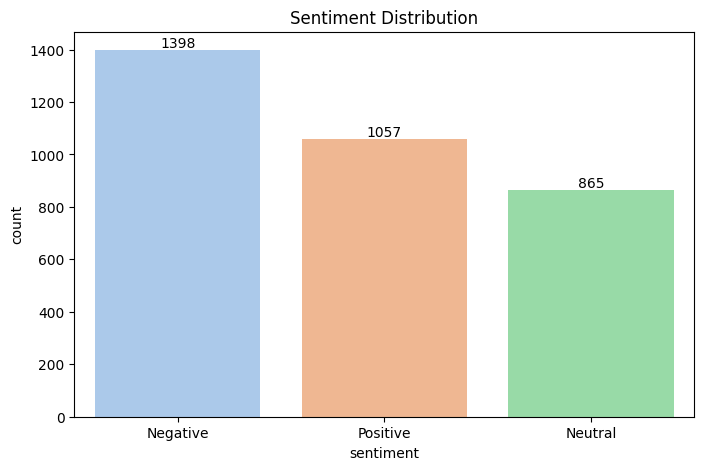

In [241]:
# Create canvas
plt.figure(figsize=(8, 5))
        
# Countplot
sns.countplot(x=df_eda.sentiment, palette='pastel')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Sentiment Distribution')
plt.show()


Berdasarkan grafik ini, dapat diketahui bahwa dalam `sentiment` terdapat 3 label diantaranya adalah Negative, Positive, dan Neutral. Kategori sentimen dengan jumlah tertinggi ialah Negative. Hal ini menandakan bahwa komentar netizen pada platform YouTube terkait dengan produk HP yang ada dalam dataset ini cenderung negatif daripada positif atau netral. 

### v.b.2. Comment Distribution

In [242]:
# Stopwords in indonesian
stop_words_id = set(stopwords.words('indonesian'))
print(stop_words_id)


{'mengatakan', 'supaya', 'memisalkan', 'sepantasnyalah', 'sesudah', 'ke', 'terjadi', 'kiranya', 'semula', 'berikutnya', 'agaknya', 'inikah', 'disinilah', 'jauh', 'tentu', 'kami', 'sesekali', 'kasus', 'tidaklah', 'lanjutnya', 'diucapkannya', 'tuturnya', 'berkeinginan', 'caranya', 'malahan', 'keluar', 'kurang', 'kita', 'katanya', 'diberi', 'adapun', 'seharusnya', 'pertanyakan', 'masa', 'sayalah', 'pula', 'mempersiapkan', 'punya', 'seberapa', 'semua', 'menyiapkan', 'jadilah', 'sudahlah', 'empat', 'sampai-sampai', 'maupun', 'merasa', 'berawal', 'jawab', 'menanyakan', 'dini', 'entah', 'sering', 'sedangkan', 'katakanlah', 'kira-kira', 'diantaranya', 'luar', 'rupanya', 'maka', 'berturut-turut', 'berkali-kali', 'berarti', 'dimungkinkan', 'sebut', 'mulailah', 'terlihat', 'justru', 'kelima', 'kelihatan', 'beberapa', 'kenapa', 'tersebutlah', 'menghendaki', 'mengibaratkan', 'begitupun', 'ini', 'percuma', 'cukup', 'tanyakan', 'bisa', 'tapi', 'sajalah', 'depan', 'merekalah', 'persoalan', 'jangankan'

In [243]:
# word_count
df_eda['word_count'] = df_eda['comment'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# sentence_count
df_eda['sentence_count'] = df_eda['comment'].apply(lambda x: len(sent_tokenize(x)) if pd.notnull(x) else 0)

# stop_word_count
df_eda['stop_word_count'] = df_eda['comment'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words_id]))

# char_count
df_eda['char_count'] = df_eda['comment'].apply(lambda x: len(str(x)))

# mean_word_length
df_eda['mean_word_length'] = df_eda['comment'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# punctuation_count
df_eda['punctuation_count'] = df_eda['comment'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


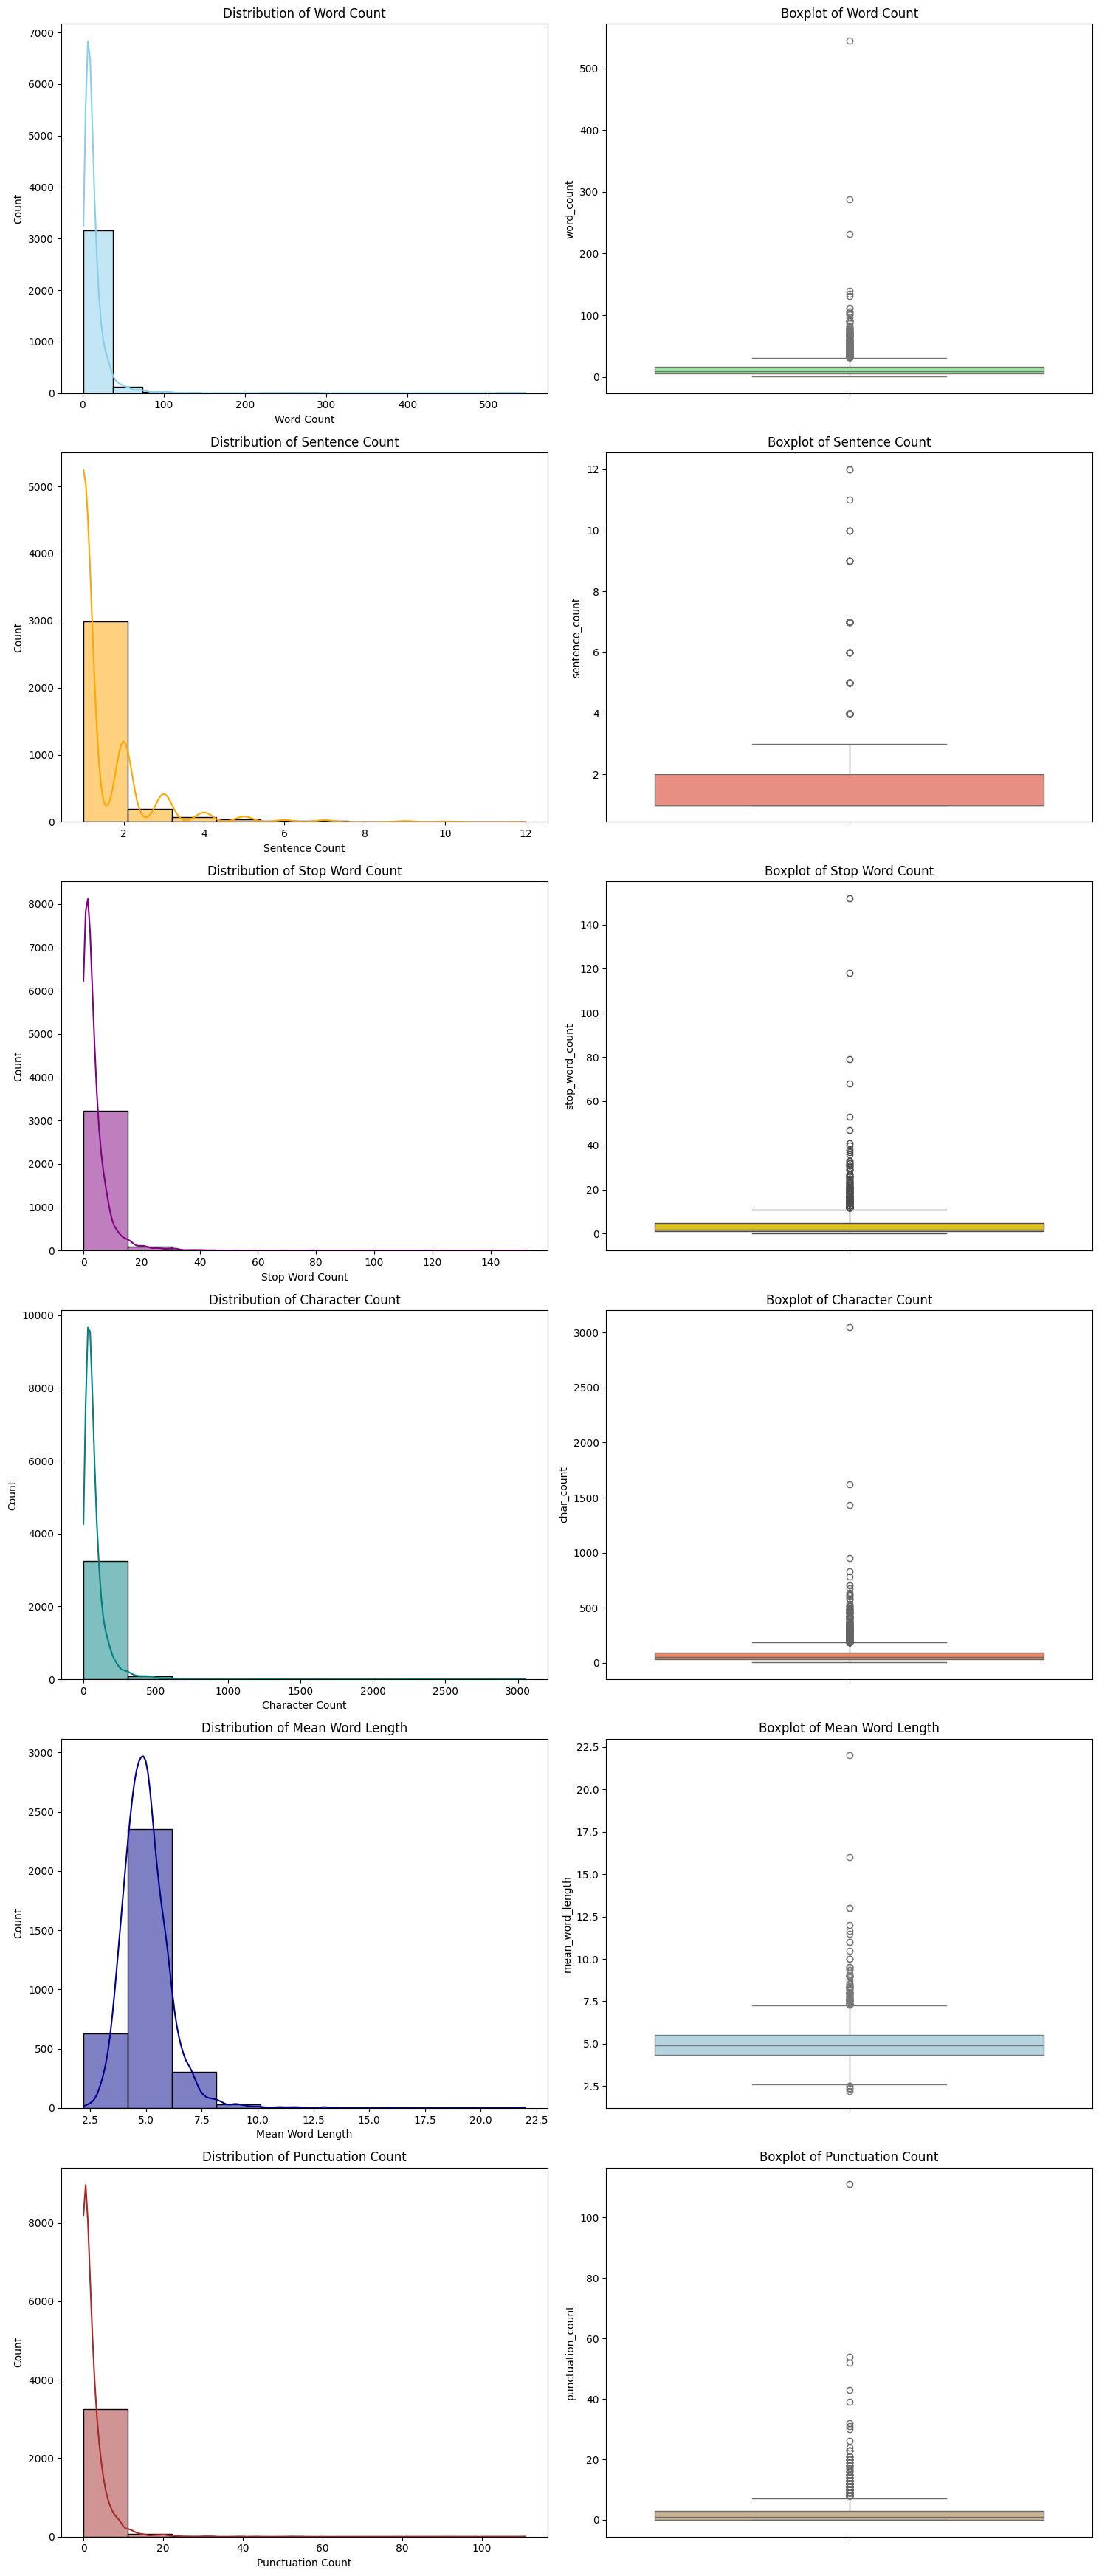

In [244]:

# Create canvas
plt.figure(figsize=(15, 35))

# Plot histogram for word_count
plt.subplot(6, 2, 1)
sns.histplot(df_eda['word_count'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')

# Plot boxplot for word_count
plt.subplot(6, 2, 2)
sns.boxplot(y=df_eda['word_count'], color='lightgreen')
plt.title('Boxplot of Word Count')

# Plot histogram for sentence_count
plt.subplot(6, 2, 3)
sns.histplot(df_eda['sentence_count'], kde=True, bins=10, color='orange')
plt.title('Distribution of Sentence Count')
plt.xlabel('Sentence Count')

# Plot boxplot for sentence_count
plt.subplot(6, 2, 4)
sns.boxplot(y=df_eda['sentence_count'], color='salmon')
plt.title('Boxplot of Sentence Count')

# Plot histogram for stop_word_count
plt.subplot(6, 2, 5)
sns.histplot(df_eda['stop_word_count'], kde=True, bins=10, color='purple')
plt.title('Distribution of Stop Word Count')
plt.xlabel('Stop Word Count')

# Plot boxplot for stop_word_count
plt.subplot(6, 2, 6)
sns.boxplot(y=df_eda['stop_word_count'], color='gold')
plt.title('Boxplot of Stop Word Count')

# Plot histogram for char_count
plt.subplot(6, 2, 7)
sns.histplot(df_eda['char_count'], kde=True, bins=10, color='teal')
plt.title('Distribution of Character Count')
plt.xlabel('Character Count')

# Plot boxplot for char_count
plt.subplot(6, 2, 8)
sns.boxplot(y=df_eda['char_count'], color='coral')
plt.title('Boxplot of Character Count')

# Plot histogram for mean_word_length
plt.subplot(6, 2, 9)
sns.histplot(df_eda['mean_word_length'], kde=True, bins=10, color='darkblue')
plt.title('Distribution of Mean Word Length')
plt.xlabel('Mean Word Length')

# Plot boxplot for mean_word_length
plt.subplot(6, 2, 10)
sns.boxplot(y=df_eda['mean_word_length'], color='lightblue')
plt.title('Boxplot of Mean Word Length')

# Plot histogram for punctuation_count
plt.subplot(6, 2, 11)
sns.histplot(df_eda['punctuation_count'], kde=True, bins=10, color='brown')
plt.title('Distribution of Punctuation Count')
plt.xlabel('Punctuation Count')

# Plot boxplot for punctuation_count
plt.subplot(6, 2, 12)
sns.boxplot(y=df_eda['punctuation_count'], color='tan')
plt.title('Boxplot of Punctuation Count')

# Adjust layout and show
plt.tight_layout()
plt.show()


### v.b.2. Word Frequency Analysis

In [245]:

stop_words_as_list = list(stop_words_id)
vectorizer = CountVectorizer(stop_words=stop_words_as_list, ngram_range=(1, 1))  # Unigrams
X = vectorizer.fit_transform(df_eda['comment'])
unigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_uni = unigram_freq.sum(axis=0).sort_values(ascending=False)


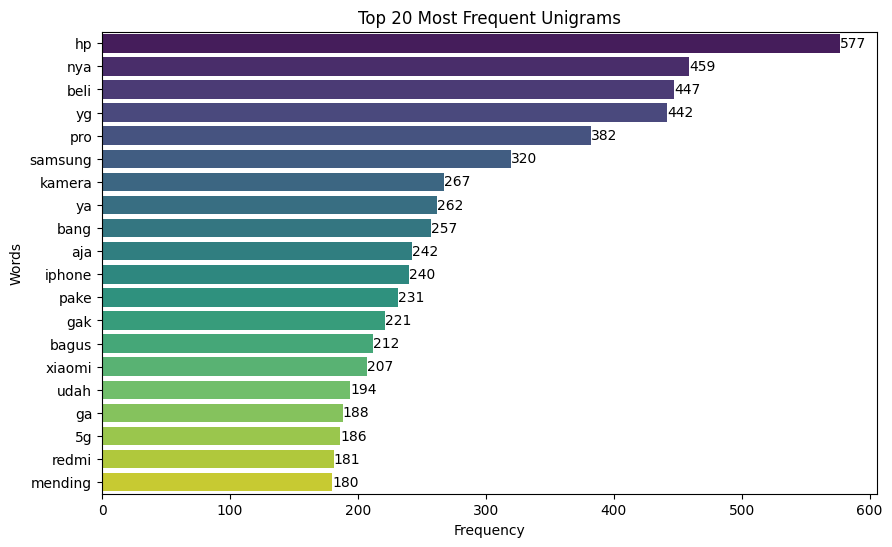

In [246]:
# Plot top 20 most frequent words
top_words = word_freq_uni.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')

for index, value in enumerate(top_words.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


In [247]:
# CountVectorizer for bigram
vectorizer = CountVectorizer(stop_words=stop_words_as_list, ngram_range=(2, 2))  # Bigram
X = vectorizer.fit_transform(df_eda['comment'])
bigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_bi = bigram_freq.sum(axis=0).sort_values(ascending=False)


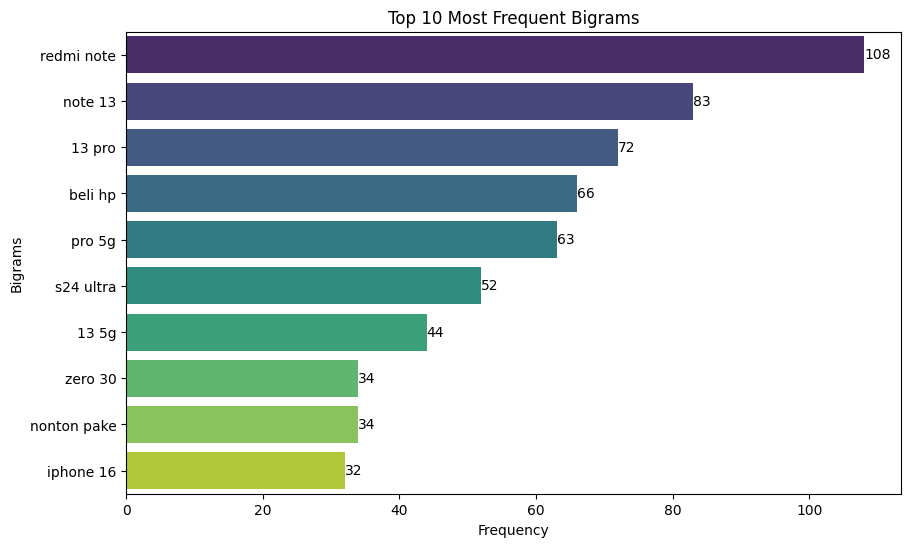

In [248]:
# Plot top 10 most frequent Bigram
plt.figure(figsize=(10, 6))

top_bigrams = word_freq_bi.head(10)

barplot = sns.barplot(x=top_bigrams.values, y=top_bigrams.index, palette='viridis')

for index, value in enumerate(top_bigrams.values):
    plt.text(value, index, str(value), va='center')  # Teks frekuensi di tengah batang

plt.title('Top 10 Most Frequent Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


### v.b.3. Wordcloud

#### All Comments

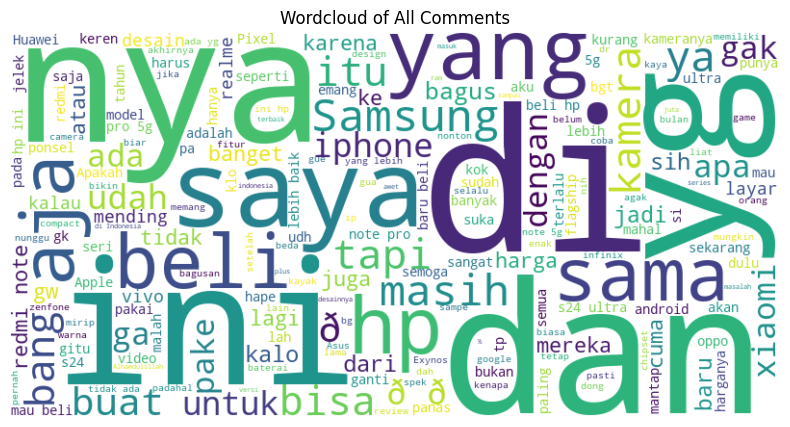

In [249]:
# Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(df_eda['comment']))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of All Comments")
plt.show()


#### Each Sentiment Category

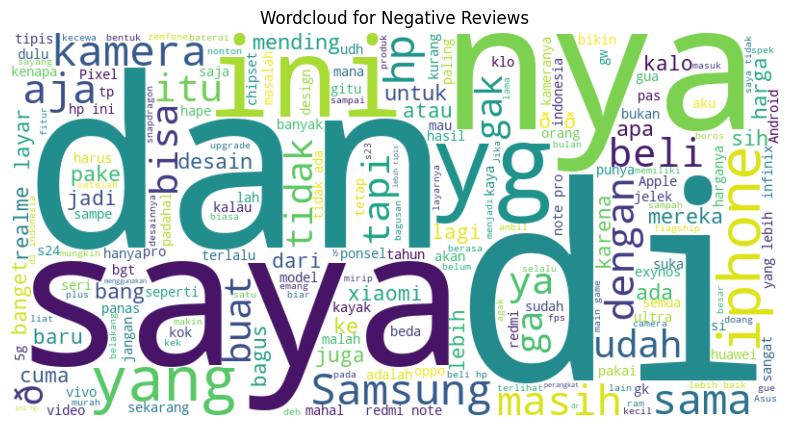

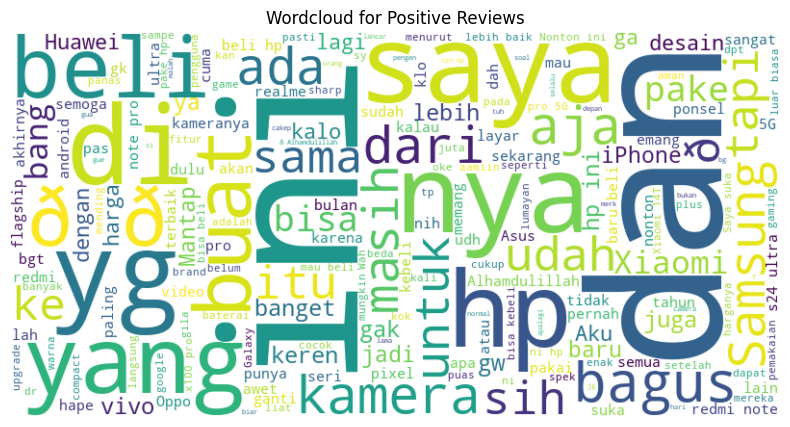

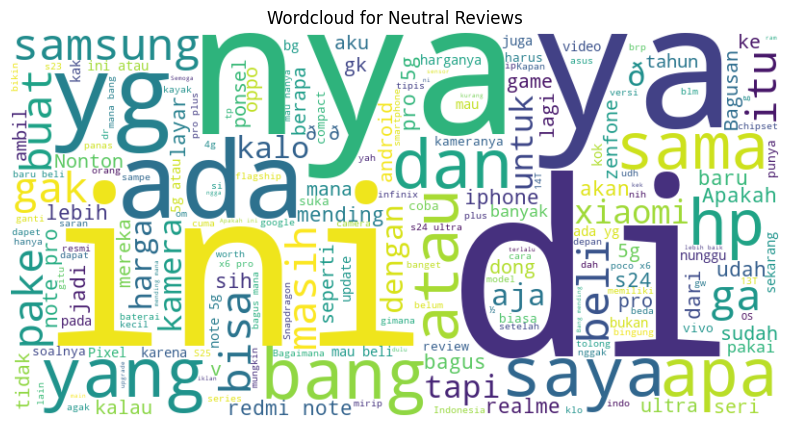

No comments available for sentiment: nan


In [250]:
# Function to generate a wordcloud
def generate_wordcloud(data, sentiment):
    # Ambil komentar untuk sentimen tertentu
    sentiment_data = data[data['sentiment'] == sentiment]['comment'].dropna()

    # Periksa apakah ada komentar untuk sentimen ini
    if len(sentiment_data) == 0:
        print(f"No comments available for sentiment: {sentiment}")
        return  # Melewatkan jika tidak ada komentar

    # Gabungkan komentar menjadi satu string
    text_data = " ".join(sentiment_data)

    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud for {sentiment} Reviews")
    plt.show()

# Wordclouds per sentiment category
for sentiment in df_eda['sentiment'].unique():
    generate_wordcloud(df_eda, sentiment)


### v.b.4. Unique Words Identification

In [251]:
from collections import Counter
all_words = ' '.join(df_eda['comment']).split()
word_counts = Counter(all_words)
unique_words = [word for word, count in word_counts.items() if count == 1]
print(f"Unique words count: {len(unique_words)}")


Unique words count: 7146


### v.b.5. Sentiment Distribution Based on Polarity Values

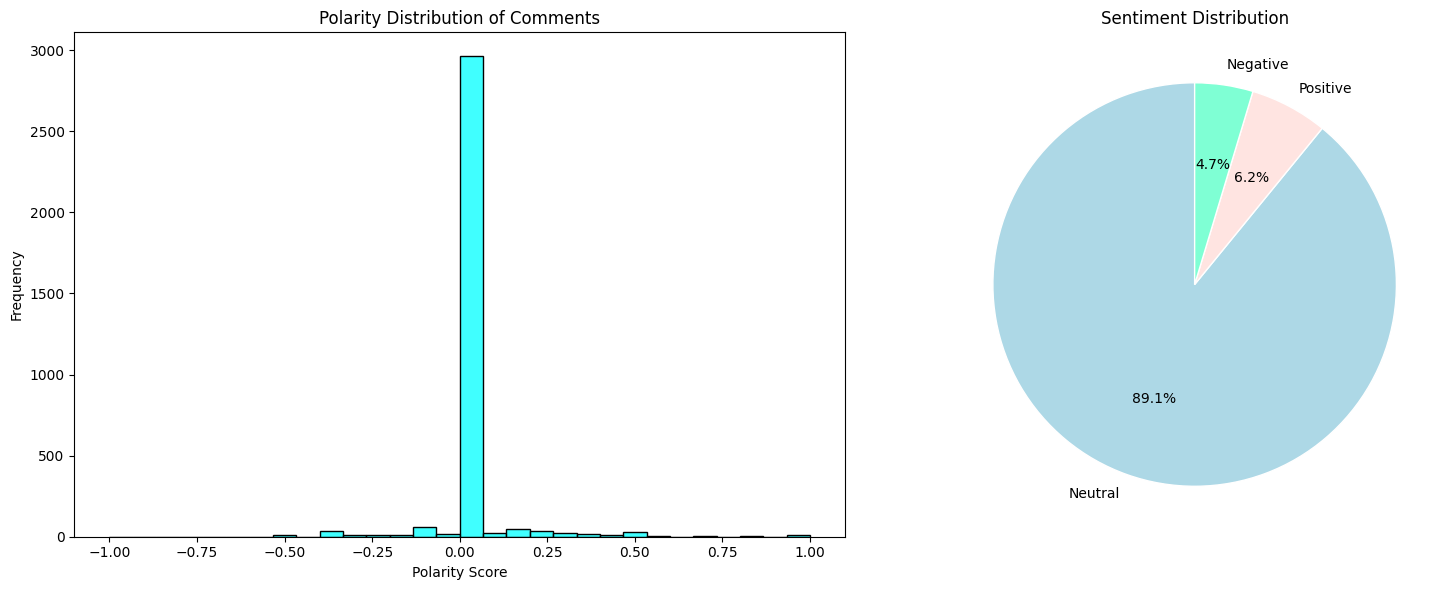

In [252]:
# Polarity
df_eda['polarity'] = df_eda['comment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Sentiment Category
df_eda['sentiment'] = df_eda['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
sentiment_counts = df_eda['sentiment'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1
sns.histplot(df_eda['polarity'], bins=30, color='cyan', ax=axes[0])
axes[0].set_title('Polarity Distribution of Comments')
axes[0].set_xlabel('Polarity Score')
axes[0].set_ylabel('Frequency')

# 2
sentiment_counts.plot.pie(
    autopct='%1.1f%%', 
    colors=['#ADD8E6', '#FFE4E1', '#7FFFD4'], 
    ax=axes[1], 
    startangle=90, 
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
axes[1].set_title('Sentiment Distribution')
axes[1].set_ylabel('')  # Menghilangkan label y untuk pie chart
plt.tight_layout()
plt.show()


##### Insight : 


**Rekomendasi :**  


-------------------

# v. Feature Engineering

## Split Feature and Target


## Split Train and Test

## Outlier

### Outlier Handling

## Missing Value


### Missing Value Handling

## Feature Selection

## Cardinality Check

### High Cardinality on Area

## Split numerical dan kategorical column

## VIF Test

## Feature Scaling

## Feature Encoding

-------------------

# vi. Model Definition

-------------------

# vii. Model Training

-------------------

# viii. Model Evaluation

##### Insight : 


##### 1. Kategori model

##### 2. Kelebihan model yang saya buat

##### 3. Kelemahan model yang saya buat :

-------------------

# ix. Model Saving

In [253]:
""" #save into file
with open('model.pkl', 'wb') as file_1:
    pickle.dump (model, file_1)
with open('model_scaler.pkl', 'wb') as file_2:
    pickle.dump (scaler, file_2)
with open('model_encoder.pkl', 'wb') as file_3:
    pickle.dump (encoder, file_3)
with open('num_col.txt', 'w') as file_4:
    json.dump (num_col, file_4)
with open('cat_col.txt', 'w') as file_5:
    json.dump (cat_col, file_5)
with open('area_mapping.json', 'w') as file_6:
    json.dump(area_freq, file_6) """

" #save into file\nwith open('model.pkl', 'wb') as file_1:\n    pickle.dump (model, file_1)\nwith open('model_scaler.pkl', 'wb') as file_2:\n    pickle.dump (scaler, file_2)\nwith open('model_encoder.pkl', 'wb') as file_3:\n    pickle.dump (encoder, file_3)\nwith open('num_col.txt', 'w') as file_4:\n    json.dump (num_col, file_4)\nwith open('cat_col.txt', 'w') as file_5:\n    json.dump (cat_col, file_5)\nwith open('area_mapping.json', 'w') as file_6:\n    json.dump(area_freq, file_6) "

-------------------

# x. Model Inference

-------------------

# xi. Kesimpulan

**Rekomendasi langkah selanjutnya**

-------------------